In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [2]:
# Load your data into a pandas DataFrame
data = pd.read_csv('hypothesis_bin.csv')
data2 = pd.read_csv('user_behavior_updated.csv')

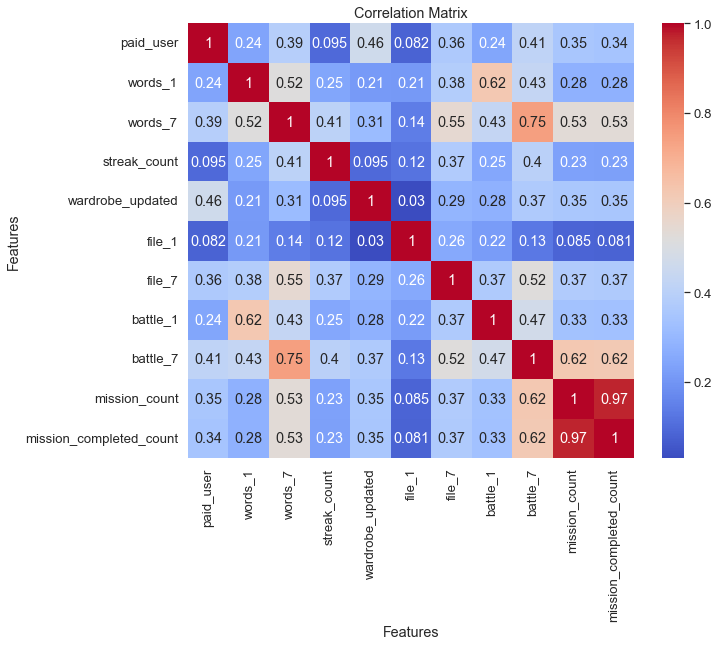

In [3]:
correlation_matrix = data.corr()

sns.set(font_scale=1.2)  # Adjust the font scale for better readability

# Create a larger figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

In [4]:
# Create a dataframe to store the VIF values
vif_data = pd.DataFrame()
vif_data['Features'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Print the VIF values
print(vif_data)


                   Features        VIF
0                 paid_user   1.754579
1                   words_1   2.309496
2                   words_7   3.272138
3              streak_count   1.420224
4          wardrobe_updated   1.646431
5                    file_1   1.509079
6                    file_7   2.069626
7                  battle_1   2.264365
8                  battle_7   3.439573
9             mission_count  20.351564
10  mission_completed_count  20.103657


In [5]:
# Create the target variable and feature matrix
#drop mission_completed_count due to high multicollinearity
target = data['paid_user']
features = data.drop(['paid_user','mission_completed_count'], axis=1)

In [6]:
# double check again for VIF
vif_data = pd.DataFrame()
vif_data['Features'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Print the VIF values
print(vif_data)



           Features       VIF
0           words_1  2.308777
1           words_7  3.242351
2      streak_count  1.403480
3  wardrobe_updated  1.434175
4            file_1  1.491371
5            file_7  2.027739
6          battle_1  2.263797
7          battle_7  3.403346
8     mission_count  1.841337


In [7]:
# Fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(features, target)

# Retrieve the coefficients
coefficients = logreg.coef_[0]
intercept = logreg.intercept_

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})

# Print the coefficients
print(coefficients_df)

            Feature  Coefficient
0           words_1     0.158952
1           words_7     0.695179
2      streak_count    -0.798032
3  wardrobe_updated     1.969315
4            file_1     0.066672
5            file_7     1.024521
6          battle_1    -0.122244
7          battle_7     0.825918
8     mission_count     0.381274


In [8]:
# Add a constant column to the features matrix
features = sm.add_constant(features)

# Fit the logistic regression model
logit_model = sm.Logit(target, features)
result = logit_model.fit()

# Retrieve the coefficients and p-values
coefficients = result.params
p_values = result.pvalues


# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Create a DataFrame to store the coefficients and p-values
coefficients_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients,'Odds Ratio': odds_ratios, 'P-value': p_values})

# Print the coefficients and p-values
coefficients_df



/Users/chingyuhsieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/chingyuhsieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Optimization terminated successfully.
         Current function value: 0.328310
         Iterations 7


/Users/chingyuhsieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,Feature,Coefficient,Odds Ratio,P-value
const,const,-2.760627,0.063252,0.000000e+00
words_1,words_1,0.159046,1.172391,4.657010e-04
words_7,words_7,0.695706,2.005124,1.029573e-39
streak_count,streak_count,-0.800719,0.449006,7.539614e-61
wardrobe_updated,wardrobe_updated,1.971161,7.179006,0.000000e+00
file_1,file_1,0.066660,1.068932,4.401376e-02
file_7,file_7,1.025807,2.789345,3.638405e-160
battle_1,battle_1,-0.123398,0.883912,5.683265e-03
battle_7,battle_7,0.827144,2.286779,1.352658e-50
mission_count,mission_count,0.381019,1.463775,8.513681e-12


In [19]:

# Add a constant column to the features matrix
features = sm.add_constant(features)

# Fit the logistic regression model
logit_model = sm.Logit(target, features)
result = logit_model.fit()

# Retrieve the coefficients, p-values, and odds ratios
coefficients = result.params
p_values = result.pvalues
odds_ratios = np.exp(coefficients)

# Create a DataFrame to store the coefficients, p-values, and odds ratios
coefficients_df = pd.DataFrame({
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'P-value': p_values
})

# Sort the coefficients table by absolute values of the coefficients
coefficients_df['Abs(Coefficient)'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs(Coefficient)', ascending=False)

# Drop the temporary column used for sorting
coefficients_df = coefficients_df.drop(columns='Abs(Coefficient)')

# Print the model summary
print("Model Summary:")
print(result.summary())

# Print a newline for clear separation
print("\n")

# Print the sorted coefficients table
print("Coefficients Table:")
print(coefficients_df)


/Users/chingyuhsieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.328310
         Iterations 7
Model Summary:
                           Logit Regression Results                           
Dep. Variable:              paid_user   No. Observations:                48983
Model:                          Logit   Df Residuals:                    48973
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2854
Time:                        14:22:44   Log-Likelihood:                -16082.
converged:                       True   LL-Null:                       -22504.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.7606      0.028    -98.055      0.000      -2.816      -2.

## user_behavior

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48983 entries, 0 to 48982
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   iduser            48983 non-null  int64
 1   idhero            48983 non-null  int64
 2   tour              48983 non-null  int64
 3   paid_user         48983 non-null  int64
 4   customize         48983 non-null  int64
 5   num_news_read     48983 non-null  int64
 6   highest_streak    48983 non-null  int64
 7   sum_wordcount     48983 non-null  int64
 8   friends_amount    48983 non-null  int64
 9   count_common      48983 non-null  int64
 10  count_required    48983 non-null  int64
 11  count_completed   48983 non-null  int64
 12  count_lost        48983 non-null  int64
 13  highest_area      48983 non-null  int64
 14  inventory_count   48983 non-null  int64
 15  wardrobe_updated  48983 non-null  int64
dtypes: int64(16)
memory usage: 6.0 MB


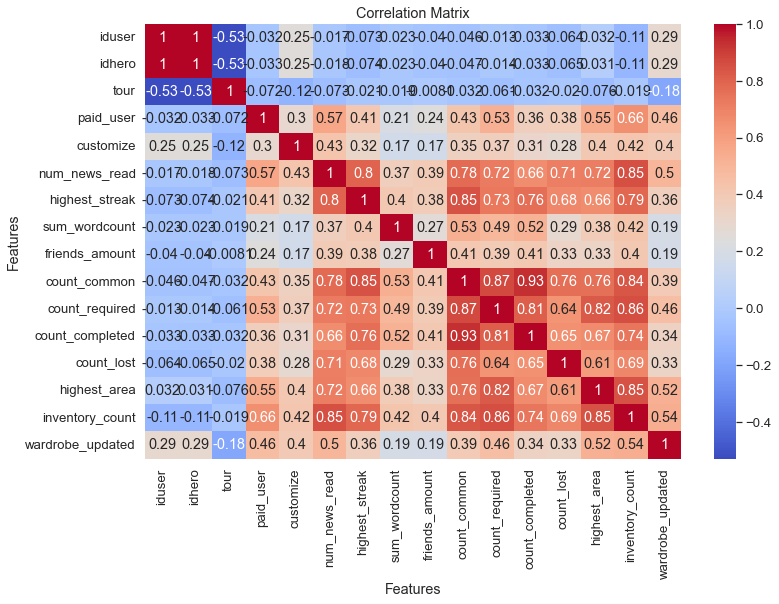

In [10]:
correlation_matrix = data2.corr()

sns.set(font_scale=1.2)  # Adjust the font scale for better readability

# Create a larger figure
plt.figure(figsize=(12, 8))

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Display the plot
plt.show()

In [11]:
# Create a dataframe to store the VIF values
vif_data2 = pd.DataFrame()
vif_data2['Features'] = data2.columns
vif_data2['VIF'] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]

# Print the VIF values
print(vif_data2)

            Features          VIF
0             iduser  2296.028318
1             idhero  2314.982212
2               tour     1.537867
3          paid_user     2.446060
4          customize     1.532026
5      num_news_read     5.969760
6     highest_streak     4.652864
7      sum_wordcount     1.492877
8     friends_amount     1.276599
9       count_common    21.598755
10    count_required     6.990718
11   count_completed     9.417798
12        count_lost     2.961833
13      highest_area     4.853542
14   inventory_count    13.101773
15  wardrobe_updated     2.173221


In [12]:
# Drop the highly correlated features from the DataFrame
data2_filtered = data2.drop(['iduser','idhero','count_common','count_required','num_news_read','highest_area'], axis=1)

In [13]:
# Create a dataframe to store the VIF values
vif_data2_1 = pd.DataFrame()
vif_data2_1['Features'] = data2_filtered.columns
vif_data2_1['VIF'] = [variance_inflation_factor(data2_filtered.values, i) for i in range(data2_filtered.shape[1])]

# Print the VIF values
print(vif_data2_1)

           Features       VIF
0              tour  1.135720
1         paid_user  2.353455
2         customize  1.424000
3    highest_streak  3.493041
4     sum_wordcount  1.415397
5    friends_amount  1.264259
6   count_completed  3.364886
7        count_lost  2.234619
8   inventory_count  6.633643
9  wardrobe_updated  1.908231


In [14]:
data2_filtered

,tour,paid_user,customize,highest_streak,sum_wordcount,friends_amount,count_completed,count_lost,inventory_count,wardrobe_updated
0,1,1,0,0,0,0,0,0,116,0
1,0,1,0,20,30070,0,5,0,26,0
2,0,0,0,1,2355,0,0,0,27,0
3,0,0,0,0,0,0,0,0,4,0
4,0,1,0,207,242181,2,138,25,170,1
...,...,...,...,...,...,...,...,...,...,...
48978,0,0,0,0,21,0,0,0,7,0
48979,0,0,0,1,10949,0,0,0,20,0
48980,0,0,0,0,27,0,1,0,7,0
48981,0,0,0,1,221,0,2,0,10,0


In [15]:

# Create the target variable and feature matrix
target2 = data2_filtered['paid_user']
features2 = data2_filtered.drop('paid_user', axis=1)

# Add a constant column to the features matrix
features2 = sm.add_constant(features2)

# Fit the logistic regression model
logit_model = sm.Logit(target2, features2)
result = logit_model.fit()

# Retrieve the coefficients and p-values
coefficients = result.params
p_values = result.pvalues

# Create a DataFrame to store the coefficients and p-values
coefficients_df_2 = pd.DataFrame({'Feature': features2.columns, 'Coefficient': coefficients, 'P-value': p_values})

# Print the coefficients and p-values
coefficients_df_2





Optimization terminated successfully.
         Current function value: 0.220003
         Iterations 11


/Users/chingyuhsieh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


,Feature,Coefficient,P-value
const,const,-3.976810e+00,0.000000e+00
tour,tour,-3.607164e-01,2.454682e-13
customize,customize,7.821721e-02,2.422912e-01
highest_streak,highest_streak,2.065370e-02,5.356549e-46
sum_wordcount,sum_wordcount,-7.593250e-08,7.496649e-04
friends_amount,friends_amount,9.515005e-02,6.717241e-12
count_completed,count_completed,-9.949848e-03,5.860192e-132
count_lost,count_lost,1.042181e-01,8.771763e-24
inventory_count,inventory_count,6.260791e-02,0.000000e+00
wardrobe_updated,wardrobe_updated,7.122935e-01,1.728023e-51
